Code for generating Figure 9.5 on Gaussian mixture models.

First generate samples using ancestral sampling, while keeping track of which cluster each data point came from.

Then, assuming that the parameters of GMM are known, plot each data point according to the responsibility.

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
np.random.seed(42)

In [3]:
K = 3  # number of classes
N = 500  # number of points to sample in total

In [4]:
pis = np.array([0.5, 0.3, 0.2])  # mixing coefficients
mus = np.array([[0.2, 0.4], [0.5, 0.5], [0.8, 0.6]])  # means
covs = np.array([[[0.02, 0.014], [0.014, 0.02]], [[0.02, -0.014], [-0.014, 0.02]], [[0.02, 0.014], [0.014, 0.02]]])  # covariance matrices

In [5]:
# sample from GMM using ancestral sampling (p. 432)
X = []
Z = []
for n in range(N):
    z = np.random.choice(K, p=pis)
    x = np.random.multivariate_normal(mus[z], covs[z])
    X.append(x)
    Z.append(z)  # record which cluster each data point came from
X = np.array(X)
Z = np.array(Z)

In [6]:
X.shape, Z.shape

((500, 2), (500,))

In [7]:
# convert Z to one_hot for RGB plot
one_hot = np.eye(K)[Z]
one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [8]:
# Calculate responsibilities using the Bayes' theorem (9.13)
gamma = np.zeros((N, K))
for k in range(K):
    p = multivariate_normal(mean=mus[k], cov=covs[k])
    gamma[:, k] = pis[k] * p.pdf(X)
gamma = gamma / gamma.sum(axis=1, keepdims=1)  # normalize such that each row sums to 1

In [9]:
np.allclose(gamma.sum(axis=1), 1.0)  # confirming that each row of gamma sums to 1

True

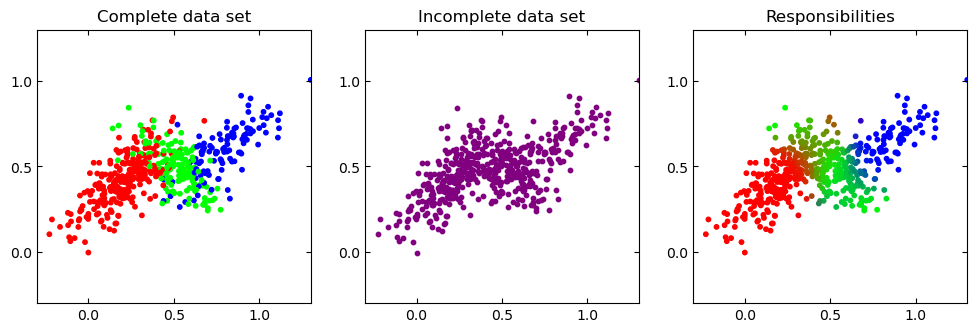

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
ax[0].scatter(X[:, 0], X[:, 1], s=10, c=one_hot)
ax[0].axis('square')
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([0, 0.5, 1])
ax[0].set_xlim(-0.3, 1.3)
ax[0].set_ylim(-0.3, 1.3)
ax[0].set_title('Complete data set')
ax[0].tick_params(labelsize=10, direction='in', which='both', right=True, top=True)

ax[1].scatter(X[:, 0], X[:, 1], s=10, c='purple')
ax[1].axis('square')
ax[1].set_xticks([0, 0.5, 1])
ax[1].set_yticks([0, 0.5, 1])
ax[1].set_xlim(-0.3, 1.3)
ax[1].set_ylim(-0.3, 1.3)
ax[1].set_title('Incomplete data set')
ax[1].tick_params(labelsize=10, direction='in', which='both', right=True, top=True)

ax[2].scatter(X[:, 0], X[:, 1], s=10, c=gamma)
ax[2].axis('square')
ax[2].set_xticks([0, 0.5, 1])
ax[2].set_yticks([0, 0.5, 1])
ax[2].set_xlim(-0.3, 1.3)
ax[2].set_ylim(-0.3, 1.3)
ax[2].set_title('Responsibilities')
ax[2].tick_params(labelsize=10, direction='in', which='both', right=True, top=True)

plt.show()